In [ ]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

# Normalize pixel values to a range of 0 to 1
X = X / 255.0

# Split the dataset into training (60,000 images) and testing sets (10,000 images)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the value of k
k = 3
knn = KNeighborsClassifier(n_neighbors=k)


In [ ]:
# Train the KNN classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.97


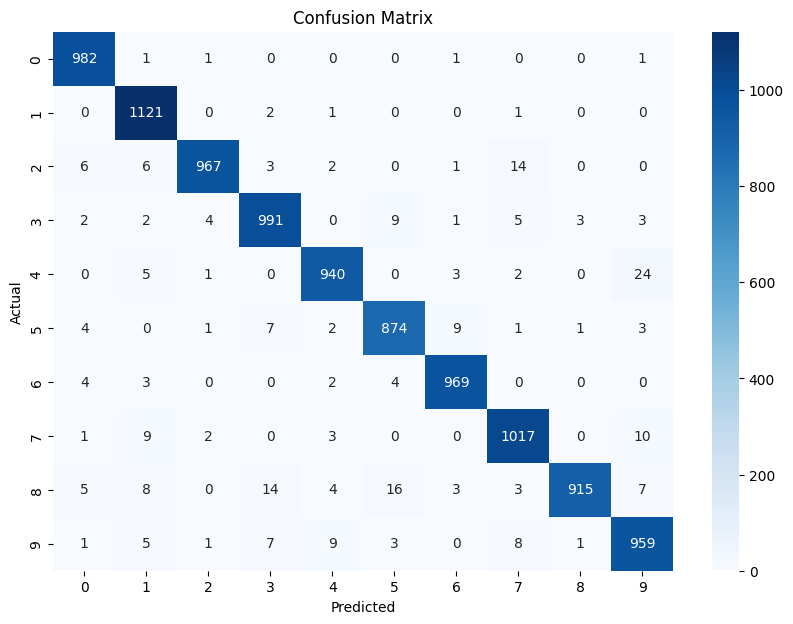

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


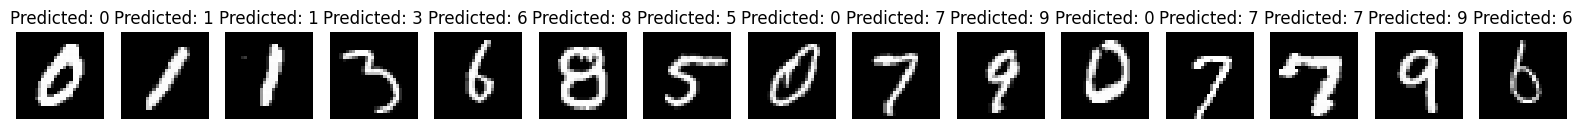

In [ ]:
import numpy as np


num_images = 15
indices = np.random.choice(len(X_test), num_images, replace=False)
selected_images = X_test.iloc[indices].values
selected_labels = y_test.iloc[indices].values
predicted_labels = knn.predict(selected_images)


plt.figure(figsize=(20, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()